# Data Analysis Maxims Forced Choice (Flan-T5-xxl)

In [36]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from matplotlib.backends.backend_pdf import PdfPages

In [6]:
os.chdir("C:/Users/shagr/OneDrive/Desktop/LLM-Project/github/LLM_link-master/results/fc")

In [7]:
csv_files = [f for f in os.listdir() if f.endswith('.csv')]
print(csv_files)

['Maxims_results_FC_Both_seed0.csv', 'Maxims_results_FC_Both_seed1.csv', 'Maxims_results_FC_Both_seed2.csv', 'Maxims_results_FC_Both_seed3.csv', 'Maxims_results_FC_Both_seed4.csv', 'Maxims_results_FC_Content_seed0.csv', 'Maxims_results_FC_Content_seed1.csv', 'Maxims_results_FC_Content_seed2.csv', 'Maxims_results_FC_Content_seed3.csv', 'Maxims_results_FC_Content_seed4.csv', 'Maxims_results_FC_Number_seed0.csv', 'Maxims_results_FC_Number_seed1.csv', 'Maxims_results_FC_Number_seed2.csv', 'Maxims_results_FC_Number_seed3.csv', 'Maxims_results_FC_Number_seed4.csv']


In [8]:
dfs = []

for csv in csv_files:
    df = pd.read_csv(csv)
    dfs.append(df)

In [9]:
final_df = pd.concat(dfs, ignore_index=True)

In [10]:
display(final_df)

,phenomenon,item_number,prompt,true_answer_key,true_answer,scenarios,options,generation,sum_logits
0,Both,1,Task: You will read short stories that describ...,3,He disliked the talk that his boss gave but do...,"Bob is having a lunch meeting with his boss, M...",['He is excited about the upcoming trip to Jap...,1,-936062.5000
1,Both,2,Task: You will read short stories that describ...,2,Alex thinks that Richard's painting is mediocre.,"Richard came to visit his friend, Alex. Alex i...",['Alex is proud of the painting job that he di...,1,-791136.9375
2,Both,3,Task: You will read short stories that describ...,2,She does not want to discuss the topic that Le...,Leslie and Jane are chatting at a coffee shop....,['She thinks that it is the best latte in the ...,2,-867156.1250
3,Both,4,Task: You will read short stories that describ...,2,He pretends that he did not understand his wif...,Kelsey is in a bad mood. Every minor thing irr...,['He is thankful for her offer of beer and chi...,1,-777659.7500
4,Both,5,Task: You will read short stories that describ...,2,Mark's opinion of Jane as a financial manager ...,"Mark is discussing Jane, a senior financial ma...","[""Mark's opinion of Jane as a financial manage...",1,-902850.8750
...,...,...,...,...,...,...,...,...,...
295,Number,16,Task: You will read short stories that describ...,2,Freddie will never give Berta any money.,Berta often forgets to return money that she b...,['Freddie can give Berta some money that he wi...,1,-883192.3750
296,Number,17,Task: You will read short stories that describ...,2,Katy doubts that Mr. Smith is a smart individual.,Lars and Katy are discussing their CEO. Lars s...,['Katy agrees that Mr. Smith is a smart indivi...,4,-772803.6250
297,Number,18,Task: You will read short stories that describ...,3,Samantha's dad thinks that Samantha has an inc...,Samantha is talking with her dad about her fia...,"[""Samantha's dad thinks that Samantha's fiance...",2,-852363.1250
298,Number,19,Task: You will read short stories that describ...,2,Bianka does not want Lenny to know her address.,Lenny is saying goodbye to his date Bianka. Le...,"['Bianka is an alien.', 'Bianka does not want ...",2,-811732.4375


In [11]:
path = os.getcwd()
print(path)

C:\Users\shagr\OneDrive\Desktop\LLM-Project\github\LLM_link-master\results\fc


In [12]:
# Function to compare and populate the 'correct' column
def compare_and_fill(row):
    if row['phenomenon'] == 'Content':
        return row['true_answer'] == row['generation']
    elif row['phenomenon'] in ['Number', 'Both']:
        return row['true_answer_key'] == row['generation']
    else:
        return False

# Apply the function to each row and populate the 'correct' column
final_df['correct'] = final_df.apply(compare_and_fill, axis=1)

# Display the updated dataframe
#print(final_df)

In [13]:
row_count = len(final_df.index)
print(row_count)

300


In [14]:
#display(final_df)
final_df

,phenomenon,item_number,prompt,true_answer_key,true_answer,scenarios,options,generation,sum_logits,correct
0,Both,1,Task: You will read short stories that describ...,3,He disliked the talk that his boss gave but do...,"Bob is having a lunch meeting with his boss, M...",['He is excited about the upcoming trip to Jap...,1,-936062.5000,False
1,Both,2,Task: You will read short stories that describ...,2,Alex thinks that Richard's painting is mediocre.,"Richard came to visit his friend, Alex. Alex i...",['Alex is proud of the painting job that he di...,1,-791136.9375,False
2,Both,3,Task: You will read short stories that describ...,2,She does not want to discuss the topic that Le...,Leslie and Jane are chatting at a coffee shop....,['She thinks that it is the best latte in the ...,2,-867156.1250,True
3,Both,4,Task: You will read short stories that describ...,2,He pretends that he did not understand his wif...,Kelsey is in a bad mood. Every minor thing irr...,['He is thankful for her offer of beer and chi...,1,-777659.7500,False
4,Both,5,Task: You will read short stories that describ...,2,Mark's opinion of Jane as a financial manager ...,"Mark is discussing Jane, a senior financial ma...","[""Mark's opinion of Jane as a financial manage...",1,-902850.8750,False
...,...,...,...,...,...,...,...,...,...,...
295,Number,16,Task: You will read short stories that describ...,2,Freddie will never give Berta any money.,Berta often forgets to return money that she b...,['Freddie can give Berta some money that he wi...,1,-883192.3750,False
296,Number,17,Task: You will read short stories that describ...,2,Katy doubts that Mr. Smith is a smart individual.,Lars and Katy are discussing their CEO. Lars s...,['Katy agrees that Mr. Smith is a smart indivi...,4,-772803.6250,False
297,Number,18,Task: You will read short stories that describ...,3,Samantha's dad thinks that Samantha has an inc...,Samantha is talking with her dad about her fia...,"[""Samantha's dad thinks that Samantha's fiance...",2,-852363.1250,False
298,Number,19,Task: You will read short stories that describ...,2,Bianka does not want Lenny to know her address.,Lenny is saying goodbye to his date Bianka. Le...,"['Bianka is an alien.', 'Bianka does not want ...",2,-811732.4375,True


In [15]:
# Save the dataframe
#final_df.to_csv('C:/Users/shagr/OneDrive/Desktop/LLM-Project/github/LLM_link-master/analysis/dataframe_fc.csv', index=False, mode='w')
final_df.to_csv('./analysis', index=False, mode='w')

# Human Data

In [16]:
def read_human_data():
    dfs = []
    df_dir = "C:/Users/shagr/OneDrive/Desktop/LLM-Project/github/LLM_link-master/human_data/Human_Maxims.csv"
    df = pd.read_csv(df_dir)
    dfs.append(df)
    df = pd.concat(dfs).drop("Unnamed: 0", axis=1).reset_index().drop("index", axis=1)
    df = df.rename(columns={"itemNum": "item_id", "Correct": "correct", "Task": "phenomenon", "OptionChosen": "answer"})
    df.answer = df.answer.apply(lambda x: int(x[-1]))
    #df.phenomenon = df.phenomenon.map(PHENOMENA_PRETTY)
    return df

In [17]:
human_df = read_human_data()
print("Number of human participants:", human_df.pKey.nunique())

Number of human participants: 374


In [18]:
display(human_df)

,pKey,item_id,correct,phenomenon,answer
0,100,6,1,MV,2
1,100,3,1,MV,2
2,100,16,1,MV,2
3,100,11,1,MV,2
4,100,7,1,MV,3
...,...,...,...,...,...
7475,99,13,0,MV,1
7476,99,9,0,MV,3
7477,99,20,1,MV,2
7478,99,10,0,MV,1


In [19]:
# Rename some column names
human_df.rename(
    columns={"item_id": "item_number", "answer": "generation"},
    inplace=True,
)

# Transform multiple integers to boolean
human_df = human_df.astype({'correct': bool})  

# Change phenomenon to "Human"
human_df.replace("MV", "Human", inplace=True)

display(human_df)

,pKey,item_number,correct,phenomenon,generation
0,100,6,True,Human,2
1,100,3,True,Human,2
2,100,16,True,Human,2
3,100,11,True,Human,2
4,100,7,True,Human,3
...,...,...,...,...,...
7475,99,13,False,Human,1
7476,99,9,False,Human,3
7477,99,20,True,Human,2
7478,99,10,False,Human,1


# Concatinate Model and Human Data

In [20]:
main_df = pd.concat([final_df, human_df])
#main_df.head()
# Save the dataframe
main_df.to_csv('./dataframe_main-fc.csv', index=False, mode='w')
main_df

,phenomenon,item_number,prompt,true_answer_key,true_answer,scenarios,options,generation,sum_logits,correct,pKey
0,Both,1,Task: You will read short stories that describ...,3.0,He disliked the talk that his boss gave but do...,"Bob is having a lunch meeting with his boss, M...",['He is excited about the upcoming trip to Jap...,1,-936062.5000,False,NaN
1,Both,2,Task: You will read short stories that describ...,2.0,Alex thinks that Richard's painting is mediocre.,"Richard came to visit his friend, Alex. Alex i...",['Alex is proud of the painting job that he di...,1,-791136.9375,False,NaN
2,Both,3,Task: You will read short stories that describ...,2.0,She does not want to discuss the topic that Le...,Leslie and Jane are chatting at a coffee shop....,['She thinks that it is the best latte in the ...,2,-867156.1250,True,NaN
3,Both,4,Task: You will read short stories that describ...,2.0,He pretends that he did not understand his wif...,Kelsey is in a bad mood. Every minor thing irr...,['He is thankful for her offer of beer and chi...,1,-777659.7500,False,NaN
4,Both,5,Task: You will read short stories that describ...,2.0,Mark's opinion of Jane as a financial manager ...,"Mark is discussing Jane, a senior financial ma...","[""Mark's opinion of Jane as a financial manage...",1,-902850.8750,False,NaN
...,...,...,...,...,...,...,...,...,...,...,...
7475,Human,13,NaN,NaN,NaN,NaN,NaN,1,NaN,False,99.0
7476,Human,9,NaN,NaN,NaN,NaN,NaN,3,NaN,False,99.0
7477,Human,20,NaN,NaN,NaN,NaN,NaN,2,NaN,True,99.0
7478,Human,10,NaN,NaN,NaN,NaN,NaN,1,NaN,False,99.0


# Analyzing the dataframe and creating graphs

# Correctness:

In [21]:
# get the number of values

count_number = main_df['phenomenon'].value_counts()['Number']
count_content = main_df['phenomenon'].value_counts()['Content']
count_both = main_df['phenomenon'].value_counts()['Both']
count_human = main_df['phenomenon'].value_counts()['Human']

print(count_number, count_content, count_both, count_human)

100 100 100 7480


In [22]:
# count correct answers
print("True:", main_df['correct'].sum())
print("False:", (~main_df['correct'].sum())*-1)
#print(main_df.groupby('phenomenon').count())

True: 5998
False: 5999


In [23]:
def cor_task(df):
    df = df.groupby("phenomenon")["correct"].apply(lambda x: (x == True).sum() / x.count())
    return df

cor_val = cor_task(main_df)

In [24]:
print(cor_val.index)
#print(type(cor_val))

Index(['Both', 'Content', 'Human', 'Number'], dtype='object', name='phenomenon')


In [25]:
# Get number of correct answers per phenomenon
phenomenon_dict = {}
for index, row in main_df.iterrows():
    if row["phenomenon"] not in phenomenon_dict:
        phenomenon_dict[row["phenomenon"]] = 0
    if row["correct"] == True:
        phenomenon_dict[row["phenomenon"]] += 1

print(phenomenon_dict)

{'Both': 15, 'Content': 15, 'Number': 15, 'Human': 5953}


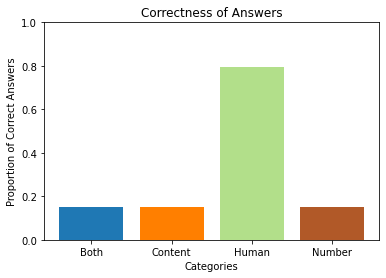

In [28]:
# Create a graph
cor_val.index=["Both", "Content", "Human", "Number"]
# Create a figure and axis
fig, ax = plt.subplots()

# Set the y-axis limits to range from 0 to 1
ax.set_ylim(0, 1)

# Create the bar plot
paired = sns.color_palette("Paired")
colors = [paired[1], paired[7], paired[2], paired[11]]  # Assign colors to the bars
bars = ax.bar(cor_val.index, cor_val.values, color=colors)

# Label the axes and give a title to the plot
plt.xlabel("Categories")
plt.ylabel("Proportion of Correct Answers")
plt.title("Correctness of Answers")

# Save the plot as PDF
plot_filename = 'C:/Users/shagr/OneDrive/Desktop/LLM-Project/github/LLM_link-master/analysis/figures/correctness_fc.pdf'
plt.savefig(plot_filename, bbox_inches='tight')

# Show the plot
plt.show()


# analysis of log probabilities

In [40]:
# Group 'final_df' by the 'phenomenon' column and calculate the mean of 'sum_logits' for True values in 'correct'
logprob_df = final_df.groupby('phenomenon')['sum_logits'].mean().reset_index()

# Rename the columns in 'logprob_df' to match your desired column names
logprob_df.columns = ['phenomena', 'logprob_true']

# Reset the index of 'logprob_df'
logprob_df.reset_index(drop=True, inplace=True)

# Display 'logprob_df'
print(logprob_df)


  phenomena   logprob_true
0      Both -835849.846875
1   Content -786110.093750
2    Number -818969.456250


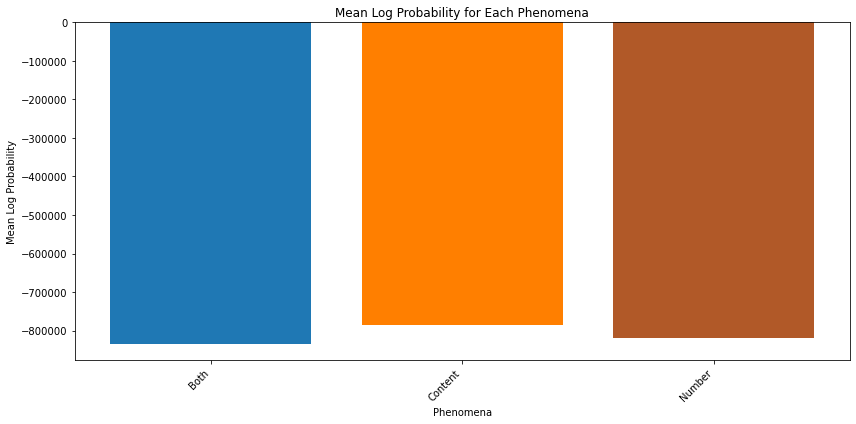

In [45]:
# Create a bar plot
plt.figure(figsize=(12, 6))
paired = sns.color_palette("Paired")
plt.bar(logprob_df['phenomena'], logprob_df['logprob_true'], color=[paired[1], paired[7], paired[11]])
plt.xlabel('Phenomena')
plt.ylabel('Mean Log Probability')
plt.title('Mean Log Probability for Each Phenomena')

# Rotate x-axis labels for better readability (optional)
plt.xticks(rotation=45, ha='right')

# Save the plot as a file 
plot_filename = 'C:/Users/shagr/OneDrive/Desktop/LLM-Project/github/LLM_link-master/analysis/figures/answersprob_free.pdf'
plt.savefig(plot_filename, bbox_inches='tight')

# Display the plot
plt.tight_layout()
plt.show()


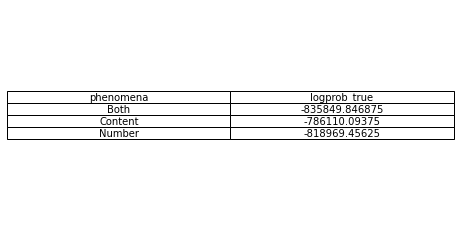

In [42]:
# Create a table-like visualization of the DataFrame
fig, ax = plt.subplots(figsize=(8, 4))
ax.axis('tight')
ax.axis('off')
ax.table(cellText=logprob_df.values, colLabels=logprob_df.columns, loc='center', cellLoc='center')

# Save the visualization to a PDF file
with PdfPages('logprob_df_table.pdf') as pdf:
    pdf.savefig(fig, bbox_inches='tight')

# Display the table (optional)
plt.show()
